# Step-by-Step  Pycaret Tutorial

In [ ]:
#!pip install pycaret

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# Any results you write to the current directory are saved as output.

## Getting Data

In [5]:
df=pd.read_csv('/data1/kaggle/fraud_of_creditcard/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
len(df[df['Class']==0])

284315

In [8]:
len(df[df['Class']==1])

492

## Setting up Environment
The first step of any machine learning experiment in PyCaret is setting up the environment by importing the required module and initializing setup( ). The module used in this example is pycaret.classification.
Once the module is imported, setup() is initialized by defining the dataframe (‘diabetes’) and the target variable (‘Class variable’).

All the preprocessing steps are applied within setup(). With over 20 features to prepare data for machine learning, PyCaret creates a transformation pipeline based on the parameters defined in setup function. It automatically orchestrates all dependencies in a pipeline so that you don’t have to manually manage the sequential execution of transformations on test or unseen dataset. PyCaret’s pipeline can easily be transferred across environments to run at scale or be deployed in production with ease. Below are preprocessing features available in PyCaret as of its first release.

![title](image/preprocess_steps.png)

In [9]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = df, target = 'Class')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3390
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models
This function trains all the models in the model library and compares the common evaluation metrics using k-fold cross validation (by default 10 folds). The evaluation metrics used are:
* For Classification: Accuracy, AUC, Recall, Precision, F1, Kappa
* For Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE

In [11]:
# Extreme Gradient Boosting
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9996,0.9484,0.776,0.9604,0.857,0.8568
1,CatBoost Classifier,0.9996,0.9694,0.7805,0.9567,0.8574,0.8572
2,Random Forest Classifier,0.9995,0.9272,0.7385,0.9348,0.8232,0.823
3,Extreme Gradient Boosting,0.9995,0.9708,0.7848,0.9351,0.8496,0.8494
4,Linear Discriminant Analysis,0.9994,0.9754,0.739,0.8881,0.8048,0.8045
5,Ada Boost Classifier,0.9993,0.9541,0.7058,0.8483,0.7679,0.7675
6,Decision Tree Classifier,0.9991,0.865,0.7305,0.7637,0.744,0.7436
7,Logistic Regression,0.999,0.9109,0.6933,0.713,0.6993,0.6988
8,Gradient Boosting Classifier,0.9989,0.683,0.5025,0.8278,0.6127,0.6122
9,Ridge Classifier,0.9988,0,0.4153,0.8226,0.5454,0.5449


The Most Important Metrics is Recall. Extreme Gradient Boosting Model's Recall Metric is the Second Highest And Other Metrics are also general.
That's why We Use Extreme Gradient Boosting Model.

## Create Model
Creating a model in any module of PyCaret is as simple as writing create_model. It takes only one parameter i.e. the model name passed as string input. This function returns a table with k-fold cross validated scores and a trained model object.

In [12]:
# creating logistic regression model
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9993,0.9637,0.7083,0.8500,0.7727,0.7724
1,0.9996,0.9364,0.7500,1.0000,0.8571,0.8569
2,0.9996,0.9467,0.7500,1.0000,0.8571,0.8569
3,0.9994,0.9912,0.6400,1.0000,0.7805,0.7802
4,0.9997,0.9947,0.9167,0.9167,0.9167,0.9165
5,0.9997,0.9851,0.8333,1.0000,0.9091,0.9089
6,0.9993,0.9367,0.7083,0.8500,0.7727,0.7724
7,0.9996,0.9941,0.7917,0.9500,0.8636,0.8634
8,0.9994,0.9628,0.7917,0.8261,0.8085,0.8082
9,0.9999,0.9971,0.9583,0.9583,0.9583,0.9583


In [13]:
xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3390,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

## Tune Model
 The tune_model function is used for automatically tuning hyperparameters of a machine learning model. PyCaret uses __random grid search__ over a predefined search space. 
 This function returns a table with k-fold cross validated scores and a trained model object.

In [17]:
xgboost_tunned = tune_model('xgboost', optimize='Recall', fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9996,0.9846,0.8333,0.9091,0.8696,0.8694
1,0.9993,0.8993,0.5833,1.0000,0.7368,0.7365
2,0.9996,0.9294,0.7500,1.0000,0.8571,0.8569
3,0.9996,0.9733,0.7500,1.0000,0.8571,0.8569
4,0.9994,0.9265,0.6667,1.0000,0.8000,0.7997
5,0.9996,0.9032,0.7500,1.0000,0.8571,0.8569
6,0.9994,0.9790,0.6667,1.0000,0.8000,0.7997
7,0.9993,0.9442,0.5833,1.0000,0.7368,0.7365
8,0.9999,1.0000,1.0000,0.9231,0.9600,0.9599
9,0.9994,0.9664,0.8333,0.8333,0.8333,0.8330


## Ensemble Model
The ensemble_model function is used for ensembling trained models. It takes only one parameter i.e. a trained model object. This functions returns a table with k-fold cross validated scores and a trained model object.

In [ ]:
xgboost_bagged = ensemble_model(xgboost)

* __‘Bagging’ method is used for ensembling by default which can be changed to ‘Boosting’ by using the method parameter within the ensemble_model function.__
* __PyCaret also provide blend_models and stack_models functionality to ensemble multiple trained models.__

## Plot Model
Performance evaluation and diagnostics of a trained machine learning model can be done using the plot_model function. It takes a trained model object and the type of plot as a string input within the plot_model function.

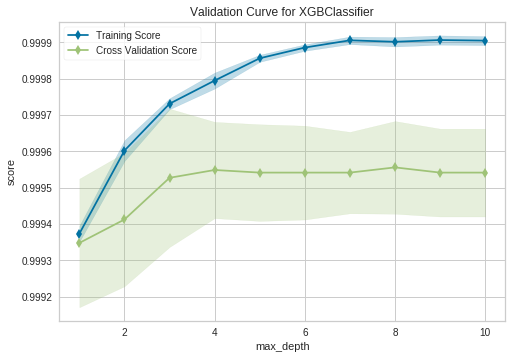

In [18]:
# AUC plot
plot_model(xgboost, plot = 'auc')
# Decision Boundary
plot_model(xgboost, plot = 'boundary')
# Precision Recall Curve
plot_model(xgboost, plot = 'pr')
# Validation Curve
plot_model(xgboost, plot = 'vc')

__Alternatively, you can use evaluate_model function to see plots via user interface within notebook.__

In [19]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpret Model
When the relationship in data is non-linear which is often the case in real life we invariably see tree-based models doing much better than simple gaussian models. However, this comes at the cost of losing interpretability as tree-based models do not provide simple coefficients like linear models. PyCaret implements SHAP (SHapley Additive exPlanations using interpret_model function.

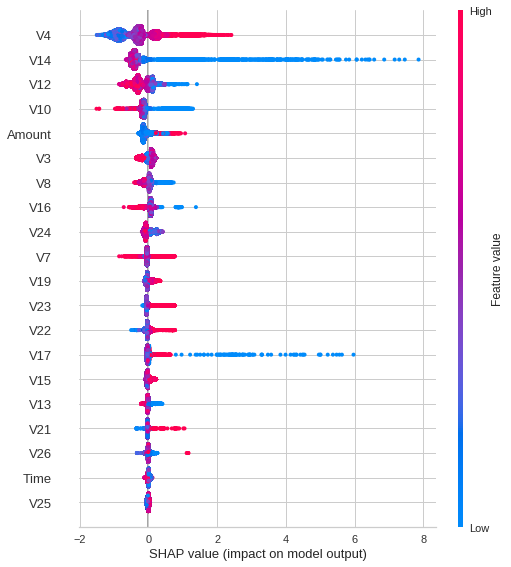

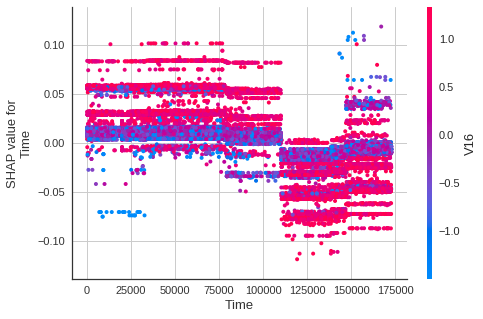

In [20]:
# summary plot
interpret_model(xgboost)
# correlation plot
interpret_model(xgboost, plot = 'correlation')

Interpretation of a particular datapoint (also known as reason argument) in the test dataset can be evaluated using ‘reason’ plot. In the below example we are checking the first instance in our test dataset.

In [21]:
interpret_model(xgboost, plot = 'reason', observation = 0)

## Predict Model
So far the results we have seen are based on k-fold cross validation on training dataset only (70% by default). In order to see the predictions and performance of the model on the test / hold-out dataset, the predict_model function is used.

predict_model function is also used to predict unseen dataset. For now, we will use the same dataset we have used for training as a proxy for new unseen dataset. In practice, predict_model function would be used iteratively, every time with a new unseen dataset.


In [24]:
pred_df = predict_model(xgboost)
pred_df.loc[pred_df['Class'] == 1].head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.9995,0.9756,0.7573,0.9398,0.8387,0.8385


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
13,55618.0,-7.427924,2.948209,-8.678550,5.185303,-4.761090,-0.957095,-7.773380,0.717309,-3.682359,...,0.789023,-0.564512,0.201196,-0.111225,1.144599,0.102280,130.44,1,1,0.9882
303,131024.0,0.469750,-1.237555,-1.767341,4.833490,-0.268715,-0.512760,1.140149,-0.341273,-1.046351,...,-0.373014,0.260801,-0.496566,-0.245973,-0.117858,0.144774,723.21,1,0,0.0011
1686,41353.0,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,...,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,34.12,1,1,0.9752
1823,11131.0,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,...,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1.00,1,1,0.9339
1954,28242.0,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,0.565835,0.303653,0.966914,-2.245882,...,1.752227,0.219925,0.156282,-0.265894,0.220694,0.256077,730.86,1,1,0.9314


## Deploy Model
One way to utilize the trained models to generate predictions on an unseen dataset is by using the predict_model function in the same notebooks / IDE in which model was trained. However, making the prediction on an unseen dataset is an iterative process; depending on the use-case, the frequency of making predictions could be from real time predictions to batch predictions. PyCaret’s deploy_model function allows deploying the entire pipeline including trained model on cloud from notebook environment.

In [ ]:
deploy_model(model = xgboost, model_name = 'xgboost_aws', platform = 'aws', 
             authentication =  {'bucket'  : 'pycaret-test'})

## Save Model / Save Experiment
Once training is completed the entire pipeline containing all preprocessing transformations and trained model object can be saved as a binary pickle file.

In [ ]:
# saving model
save_model(xgboost, model_name = 'xgboost_for_deployment')

# Conclusion
My Opinion of using pycaret is that it's easiest way to go through whole process of modeling. When doing a project, my first approach of using pycaret to set the baseline of model is not bad.